In [178]:
# Checking the version of PYTHON; we only support > 3.5
import sys
if sys.version_info < (3,5):
    raise Exception('Please use Python version 3.5 or greater.')

import numpy as np
from qiskit.tools.visualization import latex_drawer

# Importing QISKit
from qiskit import QuantumCircuit, QuantumProgram
import Qconfig

# Import basic plotting tools
from qiskit.tools.visualization import plot_histogram

#custom
import drawcircuit as dc
import operator
import math
# Quantum program setup 
Q_program = QuantumProgram()
Q_program.set_api(Qconfig.APItoken, Qconfig.config['url']) # set the APIToken and API url

In [45]:
possible_inputs = [
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0],
]
p_i = possible_inputs

In [166]:
case = [0, 0, 0]
# Creating registers
q = Q_program.create_quantum_register('q', 3)
c = Q_program.create_classical_register('c', 3)

# Quantum circuit to make the shared entangled state 
mghz = Q_program.create_circuit('mghz', [q], [c])
mghz.h(q[0])
mghz.h(q[1])
mghz.cx(q[1],q[2])
mghz.cx(q[0],q[2])
for i in range(0,3):
    mghz.h(q[i])
mghz.barrier()

for i in range(0,3):
    if case[i]==1:
        mghz.s(q[i])
    elif case[i]==0:
        mghz.u1(0, q[i])
mghz.h(q[0])
mghz.h(q[1])
mghz.h(q[2])
for i in range(0,3):
    mghz.measure(q[i], c[i])
circuits = ['mghz']
print(Q_program.get_qasms(circuits)[0])

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg c[3];
h q[0];
h q[1];
cx q[1],q[2];
cx q[0],q[2];
h q[0];
h q[1];
h q[2];
barrier q[0],q[1],q[2];
u1(0) q[0];
u1(0) q[1];
u1(0) q[2];
h q[0];
h q[1];
h q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];



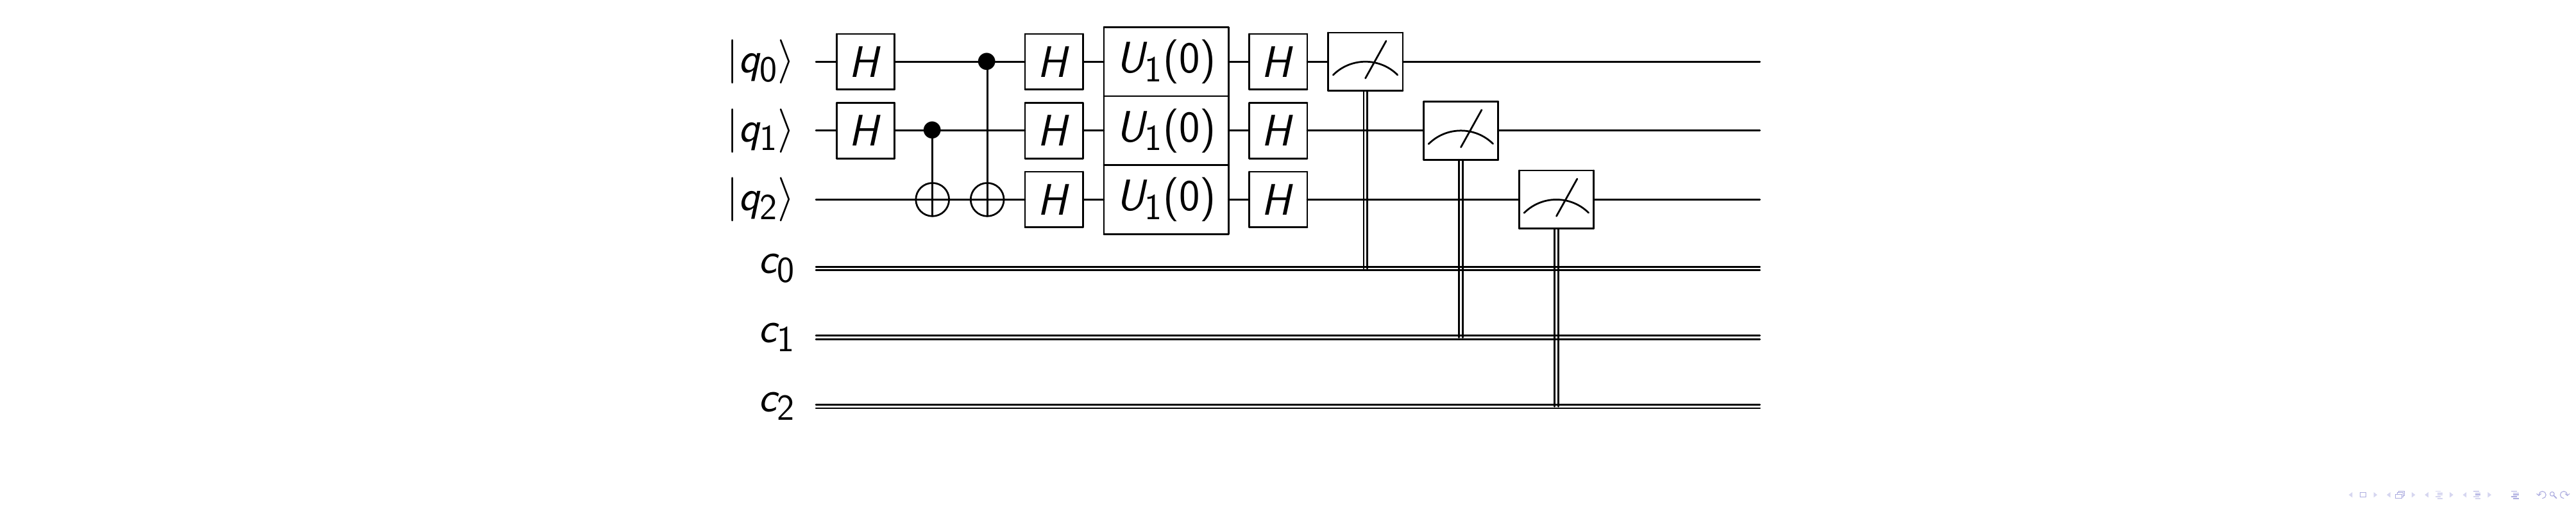

In [167]:
dc.drawCircuit(mghz)

In [168]:
# backend = 'ibmqx2' # the backend to run on
backend = 'local_qasm_simulator' 
shots = 8192# the number of shots in the experiment 

result = Q_program.execute(circuits, backend=backend, shots=shots, max_credits=3, wait=10, timeout=240)

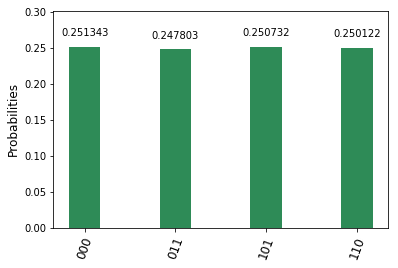

In [169]:
data = result.get_counts('mghz')
resolved = {
    'odd': 0,
    'even': 0
}
for k, v in data.items():
    if k=='001':
        resolved['odd']+=v
    if k=='010':
        resolved['odd']+=v
    if k=='100':
        resolved['odd']+=v
    if k=='111':
        resolved['odd']+=v
    if k=='000':
        resolved['even']+=v
    if k=='011':
        resolved['even']+=v
    if k=='101':
        resolved['even']+=v
    if k=='110':
        resolved['even']+=v
plot_histogram(data)
# print(data)
# print(max(data.items(), key=operator.itemgetter(1))[0])

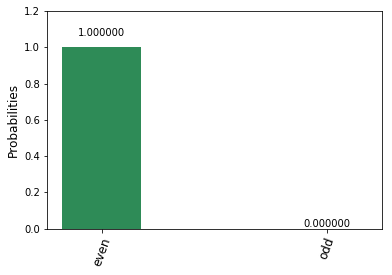

In [170]:
plot_histogram(resolved)

In [172]:
case = [1, 0, 1]
# Creating registers
q = Q_program.create_quantum_register('q', 3)
c = Q_program.create_classical_register('c', 3)

# Quantum circuit to make the shared entangled state 
mghz = Q_program.create_circuit('mghz', [q], [c])
mghz.h(q[0])
mghz.h(q[1])
mghz.cx(q[1],q[2])
mghz.cx(q[0],q[2])
for i in range(0,3):
    mghz.h(q[i])
mghz.barrier()

for i in range(0,3):
    if case[i]==1:
        mghz.s(q[i])
    elif case[i]==0:
        mghz.u1(0, q[i])
mghz.h(q[0])
mghz.h(q[1])
mghz.h(q[2])
for i in range(0,3):
    mghz.measure(q[i], c[i])
circuits = ['mghz']
print(Q_program.get_qasms(circuits)[0])

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg c[3];
h q[0];
h q[1];
cx q[1],q[2];
cx q[0],q[2];
h q[0];
h q[1];
h q[2];
barrier q[0],q[1],q[2];
s q[0];
u1(0) q[1];
s q[2];
h q[0];
h q[1];
h q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];



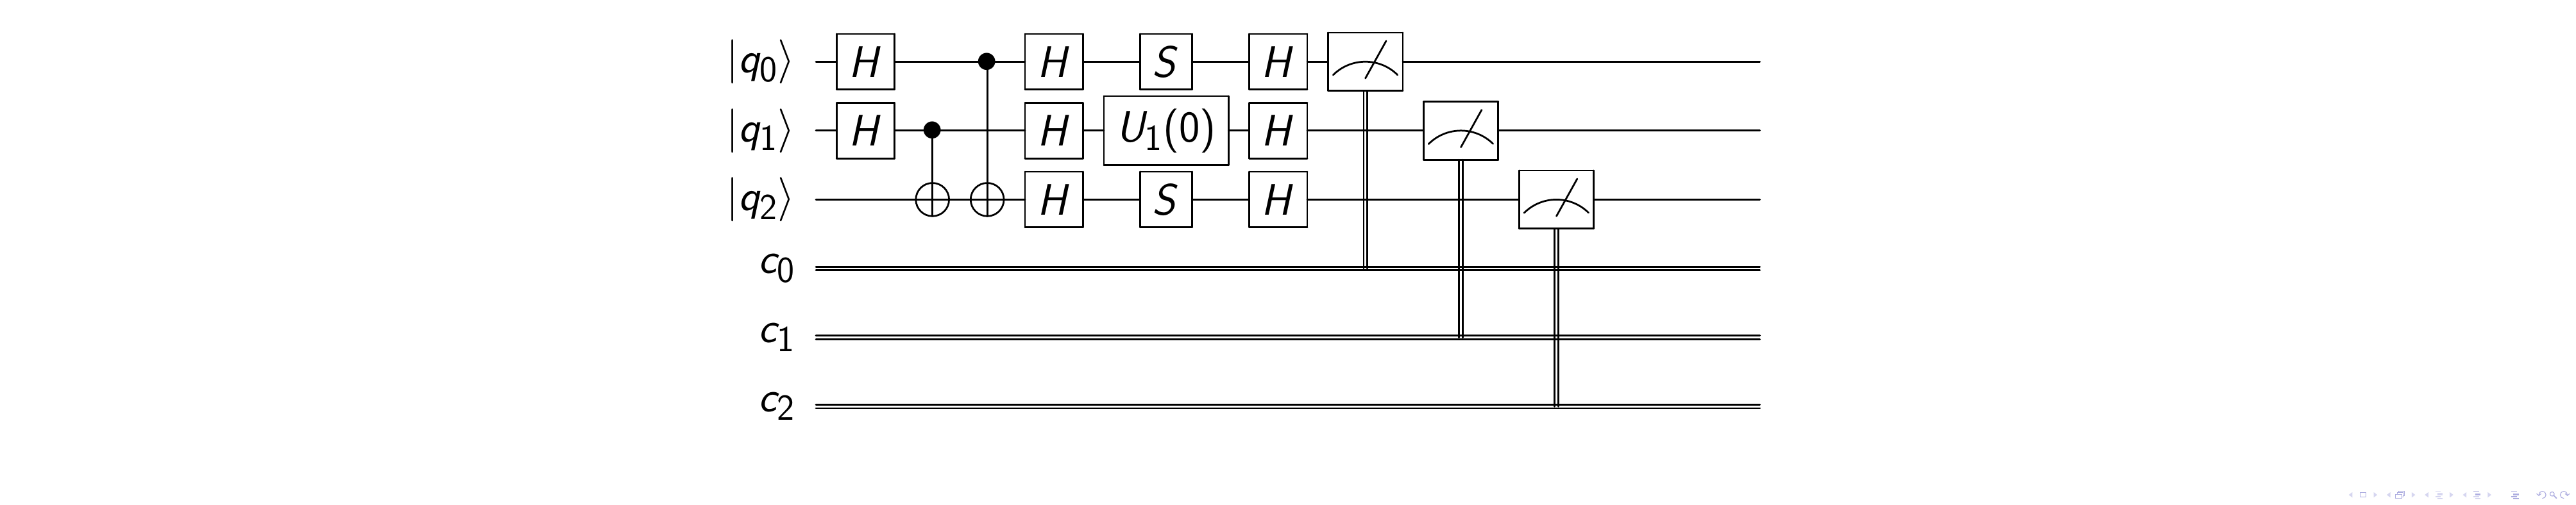

In [173]:
dc.drawCircuit(mghz)

In [179]:
latex_drawer(mghz, "test.tex", basis="u1,u2,u3,cx,x,y,z,h,s,t,rx,ry,rz")

'% \\documentclass[preview]{standalone}\n% If the image is too large to fit on this documentclass use\n\\documentclass[final]{beamer}\n% img_depth = 17, img_width = 6\n\\usepackage[size=custom,width=51,height=10]{beamerposter}\n% instead and customize the height and width (in cm) to fit.\n% Large images may run out of memory quickly.\n% To fix this use the LuaLaTeX compiler, which dynamically\n% allocates memory.\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{amsmath}\n% \\usepackage[landscape]{geometry}\n% Comment out the above line if using the beamer documentclass.\n% Defines a measurement target symbol\n\\newcommand{\\ctarg}{*+<.02em,.02em>{\n\\xy ="i","i"-<.39em,0em>;"i"+<.39em,0em> **\\dir{-},\n"i"-<0em,.39em>;"i"+<0em,.39em> **\\dir{-},"i"*\\xycircle<.4em>{} \\endxy}}\n\\begin{document}\n\\begin{equation*}\n    \\Qcircuit @C=.5em @R=0em @!R {\n\t \t\\lstick{\\ket{q_0}} & \\gate{H} & \\qw & \\ctrl{2} & \\gate{H} & \\gate{S} & \\gate{H} & \\meter & \\qw & \\qw & \\qw & \\qw & \

In [175]:
# backend = 'ibmqx2' # the backend to run on
backend = 'local_qasm_simulator' 
shots = 8192 # the number of shots in the experiment 

result = Q_program.execute(circuits, backend=backend, shots=shots, max_credits=3, wait=10, timeout=240)

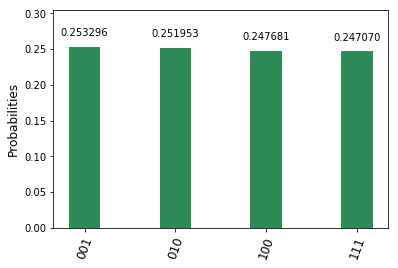

In [176]:
data = result.get_counts('mghz')
resolved = {
    'odd': 0,
    'even': 0
}
for k, v in data.items():
    if k=='001':
        resolved['odd']+=v
    if k=='010':
        resolved['odd']+=v
    if k=='100':
        resolved['odd']+=v
    if k=='111':
        resolved['odd']+=v
    if k=='000':
        resolved['even']+=v
    if k=='011':
        resolved['even']+=v
    if k=='101':
        resolved['even']+=v
    if k=='110':
        resolved['even']+=v
plot_histogram(data)
# print(data)
# print(max(data.items(), key=operator.itemgetter(1))[0])

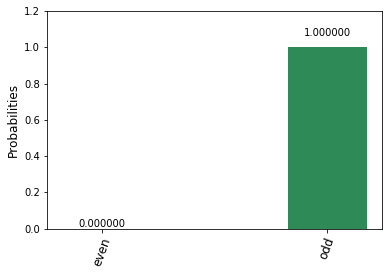

In [177]:
plot_histogram(resolved)

In [196]:
case = [1, 0, 1]
# Creating registers
q = Q_program.create_quantum_register('q', 3)
a = Q_program.create_classical_register('c0', 1)

# Quantum circuit to make the shared entangled state 
mghz = Q_program.create_circuit('mghz', [q], [a])
mghz.h(q[0])
mghz.h(q[1])
mghz.cx(q[1],q[2])
mghz.cx(q[0],q[2])
for i in range(0,3):
    mghz.h(q[i])
mghz.barrier()

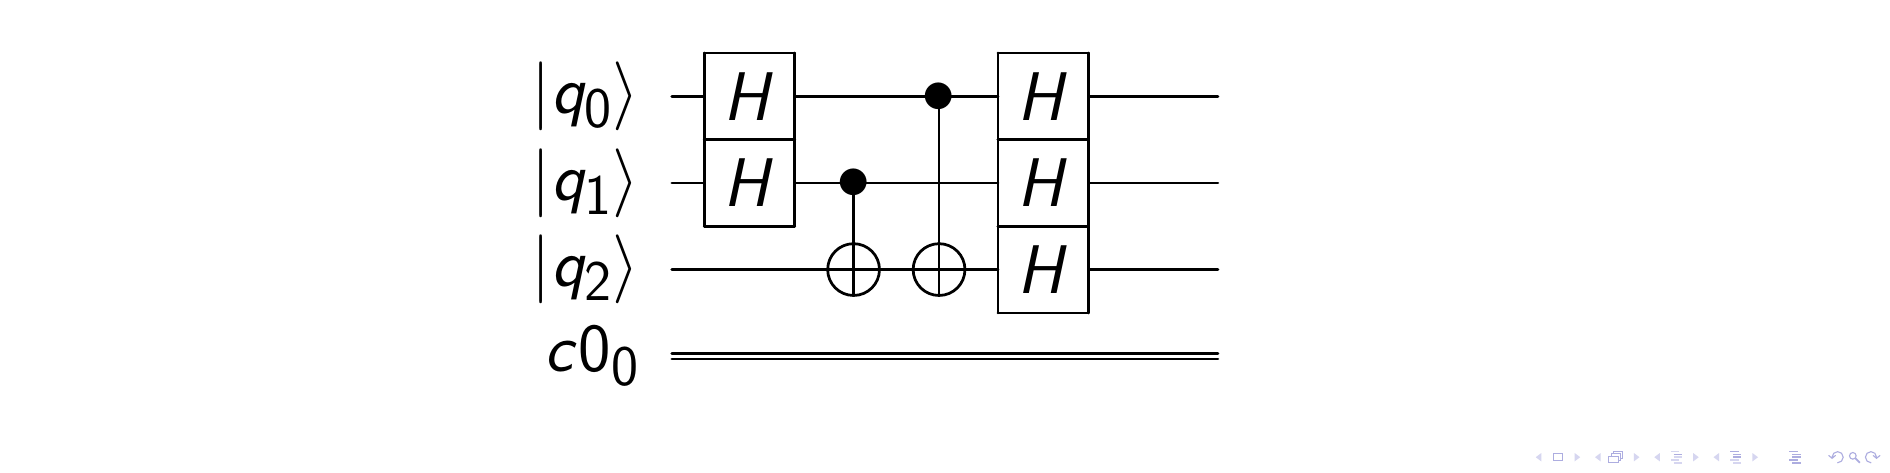

In [197]:
dc.drawCircuit(mghz)